In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn import tree
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [33]:
dataset = pd.read_csv('lele.csv')
dataset.head()

,LuasLahan,Jumlahbibit,Jumlahpakan,HasilPanen
0,288,3000,40,300
1,130,2000,100,180
2,90,1000,20,100
3,173,2500,35,250
4,152,1000,17,100


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LuasLahan    57 non-null     int64
 1   Jumlahbibit  57 non-null     int64
 2   Jumlahpakan  57 non-null     int64
 3   HasilPanen   57 non-null     int64
dtypes: int64(4)
memory usage: 1.9 KB


In [35]:
dataset.corr()

,LuasLahan,Jumlahbibit,Jumlahpakan,HasilPanen
LuasLahan,1.000000,0.393566,0.414489,0.544667
Jumlahbibit,0.393566,1.000000,0.921699,0.341449
Jumlahpakan,0.414489,0.921699,1.000000,0.318912
HasilPanen,0.544667,0.341449,0.318912,1.000000


<AxesSubplot:>

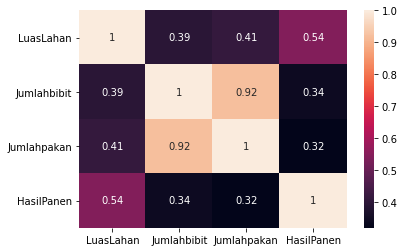

In [36]:
sns.heatmap(dataset.corr(), annot=True)

In [38]:
X = dataset.iloc[:,0:3].values 
Y = dataset.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2022)

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


hasil uji Kolmogorov Smirnov 
 KstestResult(statistic=0.2008260586431948, pvalue=0.04564700007459144)


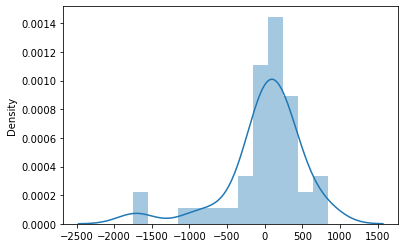

In [9]:
y_predtrain = lin_reg.predict(X_train)
err = y_predtrain - Y_train
sns.distplot(err)

z_er = stats.zscore(err)
norm_er = stats.kstest(z_er, 'norm',)
print('hasil uji Kolmogorov Smirnov \n', norm_er)

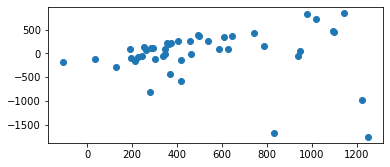

In [10]:
#uji homoskedastitas
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_predtrain, err)

In [11]:
X_constant = sm.add_constant(X_train)                
linreg = sm.OLS(Y_train,X_constant).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     5.849
Date:                Sun, 04 Dec 2022   Prob (F-statistic):            0.00202
Time:                        18:22:21   Log-Likelihood:                -344.40
No. Observations:                  45   AIC:                             696.8
Df Residuals:                      41   BIC:                             704.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -226.5098    205.331     -1.103      0.276    -641.185     188.165
x1             4.8108      1.368      3.516      0.001       2.048       7.574
x2             0.0195      0.023      0.853      0.399      -0.027       0.066
x3            -1.7794      3.100     -0.574      0.569      -8.041       4.482
==============================================================================
Omnibus:                       25.051   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.204
Skew:                           1.629   Prob(JB):                     2.52e-10
Kurtosis:                       6.599   Cond. No.                     2.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# #### Linear Regression

from sklearn.linear_model import LinearRegression

LRregressor = LinearRegression()
LRregressor.fit(X_train,Y_train)

# Calculate the training and test score
print("LRregressor / Train score is :", LRregressor.score(X_train,Y_train))
print("LRregressor / Test score is :", LRregressor.score(X_test,Y_test))

# Calculate the prediction of the model
ypred_LR = LRregressor.predict(X_test)
print("Prediction of Linear Regression:", ypred_LR)

LRregressor / Train score is : 0.2997063344652119
LRregressor / Test score is : 0.3105932594563484
Prediction of Linear Regression: [ 694.35741778 2212.29140574  450.76235248  592.14227001  129.22551242
  178.53995602  349.51477476  762.01627306  264.14885377 1114.96268801
  488.61076898  833.8473608 ]


In [13]:
# #### Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

DTregressor = DecisionTreeRegressor(max_depth=10, random_state=1)
DTregressor.fit(X_train,Y_train)

# Calculate the training and test score
print("Decision Tree Regressor / Train score is :", DTregressor.score(X_train,Y_train))
print("Decision Tree Regressor / Test score is :", DTregressor.score(X_test,Y_test))


# Calculate the prediction of the model
ypred_DTr = DTregressor.predict(X_test)
print("Prediction of Decision Tree:", ypred_DTr)

Decision Tree Regressor / Train score is : 1.0
Decision Tree Regressor / Test score is : 0.9040793028570677
Prediction of Decision Tree: [ 175. 2200. 1000.  535.  420.  360.  800.  175.  360.  100.  100.  650.]


In [14]:
# #### Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

RFregressor = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=1)
RFregressor.fit(X_train,Y_train)

# Calculate the training and test score
print("Random Forest Regressor / Train score is :", RFregressor.score(X_train,Y_train))
print("Random Forest Regressor / Test score is :", RFregressor.score(X_test,Y_test))
print("Random Forest Regressor / N° of features  are : ", RFregressor.n_features_)
print("Important features are : " , RFregressor.feature_importances_)


# Calculate the prediction of the model
ypred_RFr = RFregressor.predict(X_test)
print("Prediction of Random Forest :", ypred_RFr)

Random Forest Regressor / Train score is : 0.8057461191750346
Random Forest Regressor / Test score is : 0.6639697970129229
Random Forest Regressor / N° of features  are :  3
Important features are :  [0.59537178 0.1927686  0.21185962]
Prediction of Random Forest : [ 413.6631555  2016.9625      479.12063355  362.71548119  435.42139995
  445.5675977   479.12063355  498.23389883  445.5675977   967.62767523
  141.27339322  624.37247211]


In [15]:
from sklearn.svm import SVR

SVMregressor = SVR(kernel='linear')
SVMregressor.fit(X_train, Y_train)

# Calculate the training and test score
print("SVM regressor / Train score is :", SVMregressor.score(X_train,Y_train))
print("SVM regressor / Test score is :", SVMregressor.score(X_test,Y_test))

SVM regressor / Train score is : 0.04968624083856654
SVM regressor / Test score is : 0.2143123385208655


In [16]:
# Calculate the prediction of the model
ypred_SVMr = SVMregressor.predict(X_test)
print("Prediction of SVM :", ypred_SVMr)

Prediction of SVM : [300.48679275 851.26360798 280.7906773  277.19019616 173.47093594
 197.19344258 246.29589938 322.09106429 215.96209243 395.71846128
 236.3416698  632.38100463]


In [17]:
y_predtest = lin_reg.predict(X_test)

#MSE
MSE_train = mean_squared_error(Y_train, y_predtrain)
print('Nilai MSE data training = ', MSE_train)
MSE_test = mean_squared_error(Y_test, y_predtest)
print('Nilai MSE data testing = ', MSE_test)

#RMSE
RMSE_train = np.sqrt(MSE_train)
print('Nilai RMSE data training = ', RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print('Nilai RMSE data testing = ', RMSE_test)

#MAE
MAE_train = mean_absolute_error(Y_train, y_predtrain)
print('Nilai MAE data training = ', MAE_train)
MAE_test = mean_absolute_error(Y_test, y_predtest)
print('Nilai MAE data testing = ', MAE_test)

Nilai MSE data training =  260051.71838412515
Nilai MSE data testing =  163869.46876515108
Nilai RMSE data training =  509.95266288561055
Nilai RMSE data testing =  404.8079405905362
Nilai MAE data training =  337.69832365844866
Nilai MAE data testing =  352.5863945784447


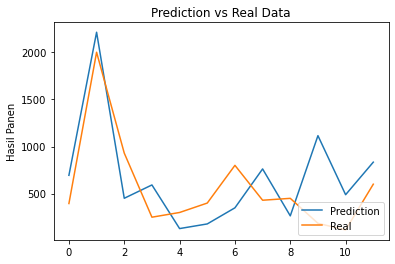

In [18]:
plt.plot(y_predtest)
plt.plot(Y_test)

plt.title("Prediction vs Real Data")

plt.ylabel("Hasil Panen")

plt.legend(labels=["Prediction","Real"],loc = 'lower right')

In [19]:
# Model Lasso
lasso_reg = Lasso(alpha=0.1).fit(X_train, Y_train)
y_predtrain_lasso = lasso_reg.predict(X_train)
y_predtest_lasso = lasso_reg.predict(X_test)

# Model Ridge
ridge_reg = Ridge(alpha=0.1).fit(X_train, Y_train)
y_predtrain_ridge = ridge_reg.predict(X_train)
y_predtest_ridge = ridge_reg.predict(X_test)

# Support Vectore Regression
sv_reg=SVR().fit(X_train, Y_train)
y_predtrain_svr = sv_reg.predict(X_train)
y_predtest_svr = sv_reg.predict(X_test)

# Decision Tree Regresion
dt_reg=DecisionTreeRegressor().fit(X_train, Y_train)
y_predtrain_dtr = dt_reg.predict(X_train)
y_predtest_dtr = dt_reg.predict(X_test)

In [20]:
#MSE dengan metode lain
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(Y_train, y_predtrain))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(Y_test, ypred_LR), '\n')

print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(Y_train, y_predtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(Y_test, y_predtest_lasso), '\n')

print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(Y_train, y_predtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(Y_test, y_predtest_ridge), '\n')

print('Nilai MSE data training Regresi SVR = ', mean_squared_error(Y_train, y_predtrain_ridge))
print('Nilai MSE data testing Regresi SVR = ', mean_squared_error(Y_test, y_predtest_ridge), '\n')

print('Nilai MSE data training Regresi DTR = ', mean_squared_error(Y_train, y_predtrain_dtr))
print('Nilai MSE data testing Regresi DTR = ', mean_squared_error(Y_test, y_predtest_dtr),'\n')

Nilai MSE data training Regresi Linier =  260051.71838412515
Nilai MSE data testing Regresi Linier =  163869.46876515108 

Nilai MSE data training Regresi Lasso =  260051.71840453625
Nilai MSE data testing Regresi Lasso =  163867.37965926767 

Nilai MSE data training Regresi Ridge =  260051.7183841916
Nilai MSE data testing Regresi Ridge =  163869.28819281855 

Nilai MSE data training Regresi SVR =  260051.7183841916
Nilai MSE data testing Regresi SVR =  163869.28819281855 

Nilai MSE data training Regresi DTR =  0.0
Nilai MSE data testing Regresi DTR =  71633.33333333333 



In [21]:
print(f'R^2 score: {lin_reg.score(X, Y)}')
print(f'R^2 score: {lasso_reg.score(X, Y)}')
print(f'R^2 score: {ridge_reg.score(X, Y)}')
print(f'R^2 score: {sv_reg.score(X, Y)}')
print(f'R^2 score: {dt_reg.score(X, Y)}')

R^2 score: 0.30212456243631336
R^2 score: 0.3021258423319275
R^2 score: 0.30212467306827706
R^2 score: -0.1496713851267648
R^2 score: 0.9561120625186255


In [43]:
text_representation = tree.export_text(DTregressor)
print(text_representation)

|--- feature_0 <= 294.00
|   |--- feature_2 <= 105.00
|   |   |--- feature_1 <= 2250.00
|   |   |   |--- feature_0 <= 105.00
|   |   |   |   |--- feature_1 <= 900.00
|   |   |   |   |   |--- value: [80.00]
|   |   |   |   |--- feature_1 >  900.00
|   |   |   |   |   |--- feature_2 <= 17.50
|   |   |   |   |   |   |--- value: [115.00]
|   |   |   |   |   |--- feature_2 >  17.50
|   |   |   |   |   |   |--- value: [100.00]
|   |   |   |--- feature_0 >  105.00
|   |   |   |   |--- feature_0 <= 141.00
|   |   |   |   |   |--- feature_2 <= 60.00
|   |   |   |   |   |   |--- feature_0 <= 115.00
|   |   |   |   |   |   |   |--- feature_2 <= 17.50
|   |   |   |   |   |   |   |   |--- value: [170.00]
|   |   |   |   |   |   |   |--- feature_2 >  17.50
|   |   |   |   |   |   |   |   |--- value: [165.00]
|   |   |   |   |   |   |--- feature_0 >  115.00
|   |   |   |   |   |   |   |--- feature_0 <= 122.50
|   |   |   |   |   |   |   |   |--- value: [135.00]
|   |   |   |   |   |   |   |--- featur

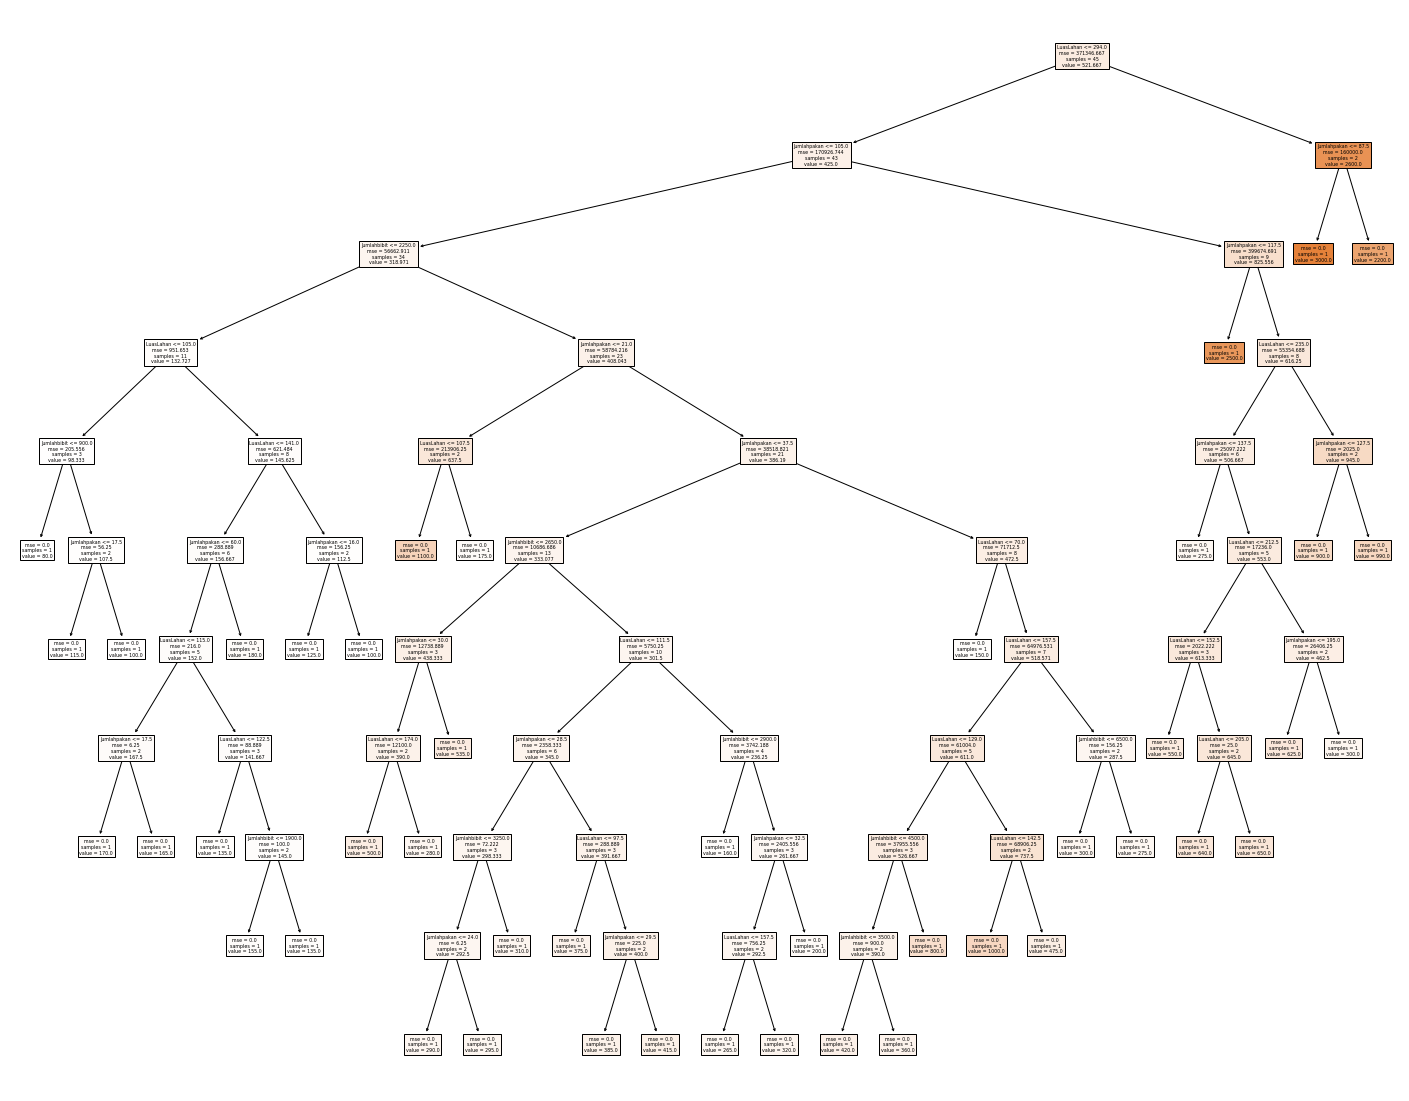

In [57]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTregressor, feature_names=["LuasLahan","Jumlahbibit","Jumlahpakan"], 
                   class_names="HasilPanen",
                   filled=True)

In [58]:
import pickle
pd.to_pickle(DTregressor, 'model_dtr.pkl')